In [10]:
import numpy as np
import cv2
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
import pywt
import cv2    

# Data Preprocessing

(301, 220, 3)

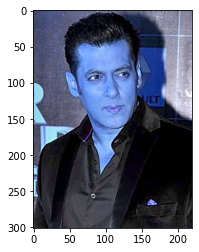

In [11]:
img = cv2.imread(r"C:\Users\prakhar\Desktop\DsProj3\simple_images\salman_khan_images\salman khan images_2.jpeg")
plt.imshow(img)
img.shape

(301, 220)

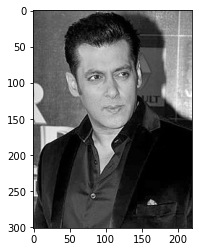

In [12]:
grayimg = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(grayimg, cmap='gray')
grayimg.shape #convert image to grayscale

In [13]:
detectface = cv2.CascadeClassifier(r'C:\Users\prakhar\Desktop\DsProjectThree\haar-cascade-files-master\haarcascade_frontalface_default.xml')
detecteye = cv2.CascadeClassifier(r'C:\Users\prakhar\Desktop\DsProjectThree\haar-cascade-files-master\haarcascade_eye.xml')
#haarcascade technique to detect face and eyes. Part of opencv library. Code refered from haarcascade documentation
#haar cascade has edge features which will move on the image to detect face and eyes
faces = detectface.detectMultiScale(grayimg, 1.3, 5)
faces #array of faces return(x,y,width,heigth)

array([[ 54,  51, 104, 104]], dtype=int32)

In [14]:
(x,y,w,h) = faces[0]#if one face then only one array returned
x,y,w,h

(54, 51, 104, 104)

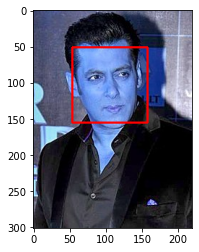

In [15]:
imagedetect = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)#crop a rectangle around face by passing x,y values
plt.imshow(imagedetect)

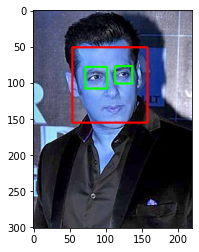

In [16]:
cv2.destroyAllWindows()#opencv documentation for eye detection
for (x,y,w,h) in faces:
    imagedetect = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    grayimage = grayimg[y:y+h, x:x+w]
    coloredimage = imagedetect[y:y+h, x:x+w]
    eyes = detecteye.detectMultiScale(grayimage)
    for (ex,ey,ew,eh) in eyes: #for loop useful when we have multiple eyes
        cv2.rectangle(coloredimage,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
        

plt.figure()
plt.imshow(imagedetect, cmap='gray')
plt.show()

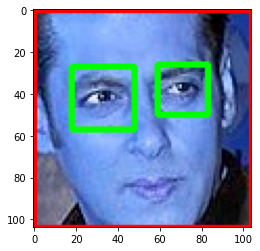

In [17]:
%matplotlib inline
plt.imshow(coloredimage, cmap='gray') #coloredimage stores the face cropped rectangle

In [18]:
cropped_img = np.array(coloredimage)
cropped_img.shape

(104, 104, 3)

In [19]:
def waveletfn(img, mode='haar', level=1): #feature extraction technique
    imArray = img
    #convert to grayscale
    imArray = cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY )
    #convert to float
    imArray =  np.float32(imArray)   
    imArray /= 255;
    # compute coefficients 
    coeffs=pywt.wavedec2(imArray, mode, level=level) #pywt is py wavelet transform function
#waveletfn gives fine details of the facial features
    #Process Coefficients
    coeffs_H=list(coeffs)  
    coeffs_H[0] *= 0;  

    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)

    return imArray_H #ref.

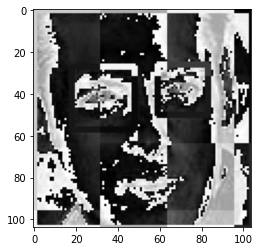

In [20]:
im_har = waveletfn(cropped_img,'db1',5)
plt.imshow(im_har, cmap='gray') #features like nose,eyes,lips are extracted 

In [21]:
def imagecropping(impath):#fn will take input image and detect fave and eyes
    img = cv2.imread(impath)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = detectface.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
        grayimage = gray[y:y+h, x:x+w]
        coloredimage = img[y:y+h, x:x+w]
        eyes = detecteye.detectMultiScale(grayimage)
        if len(eyes) >= 2:
            return coloredimage

In [22]:
datapath = r"C:\Users\prakhar\Desktop\DsProj3\simple_images"
croppedatapath = r"C:\Users\prakhar\Desktop\DsProj3\cropped"

In [23]:
import os
datadirectory = []
for entry in os.scandir(datapath):
    if entry.is_dir():
        datadirectory.append(entry.path)

In [24]:
datadirectory #stores individual paths of all celebrities

['C:\\Users\\prakhar\\Desktop\\DsProj3\\simple_images\\aamir_khan_images',
 'C:\\Users\\prakhar\\Desktop\\DsProj3\\simple_images\\deepika_padukone_images',
 'C:\\Users\\prakhar\\Desktop\\DsProj3\\simple_images\\emma_watson_images',
 'C:\\Users\\prakhar\\Desktop\\DsProj3\\simple_images\\kevin_hart_images',
 'C:\\Users\\prakhar\\Desktop\\DsProj3\\simple_images\\leonardo_di_caprio_images',
 'C:\\Users\\prakhar\\Desktop\\DsProj3\\simple_images\\salman_khan_images']

In [25]:
import shutil
if os.path.exists(croppedatapath):
     shutil.rmtree(croppedatapath)
os.mkdir(croppedatapath)

In [26]:
croppedatadirectory = []
datadict = {}
for img_dir in datadirectory:
    count = 1
    labelname = img_dir.split('\\')[-1] #get celeb names
    datadict[labelname] = []
    for entry in os.scandir(img_dir):
        coloredimage = imagecropping(entry.path) #cropping fn called
        if coloredimage is not None: #returns only when face and eyes detected
            cropped_folder = croppedatapath + labelname
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                croppedatadirectory.append(cropped_folder) #stores path names of cropped folders
                print("Cropping in ",cropped_folder)
            cropped_file_name = labelname + str(count) + ".jpg"
            cropped_file_path = cropped_folder + "/" + cropped_file_name
            cv2.imwrite(cropped_file_path, coloredimage)
            datadict[labelname].append(cropped_file_path) #will create dict where item will be celeb name and key will have image names
            count += 1

Cropping in  C:\Users\prakhar\Desktop\DsProj3\croppedaamir_khan_images
Cropping in  C:\Users\prakhar\Desktop\DsProj3\croppeddeepika_padukone_images
Cropping in  C:\Users\prakhar\Desktop\DsProj3\croppedemma_watson_images
Cropping in  C:\Users\prakhar\Desktop\DsProj3\croppedkevin_hart_images
Cropping in  C:\Users\prakhar\Desktop\DsProj3\croppedleonardo_di_caprio_images
Cropping in  C:\Users\prakhar\Desktop\DsProj3\croppedsalman_khan_images


In [27]:
croppedatadirectory

['C:\\Users\\prakhar\\Desktop\\DsProj3\\croppedaamir_khan_images',
 'C:\\Users\\prakhar\\Desktop\\DsProj3\\croppeddeepika_padukone_images',
 'C:\\Users\\prakhar\\Desktop\\DsProj3\\croppedemma_watson_images',
 'C:\\Users\\prakhar\\Desktop\\DsProj3\\croppedkevin_hart_images',
 'C:\\Users\\prakhar\\Desktop\\DsProj3\\croppedleonardo_di_caprio_images',
 'C:\\Users\\prakhar\\Desktop\\DsProj3\\croppedsalman_khan_images']

In [28]:
datadict = {}
for img_dir in croppedatadirectory:
    labelname = img_dir.split('/')[-1]
    file_list = []
    for entry in os.scandir(img_dir):
        file_list.append(entry.path)
    datadict[labelname] = file_list
datadict

{'C:\\Users\\prakhar\\Desktop\\DsProj3\\croppedaamir_khan_images': ['C:\\Users\\prakhar\\Desktop\\DsProj3\\croppedaamir_khan_images\\aamir_khan_images1.jpg',
  'C:\\Users\\prakhar\\Desktop\\DsProj3\\croppedaamir_khan_images\\aamir_khan_images10.jpg',
  'C:\\Users\\prakhar\\Desktop\\DsProj3\\croppedaamir_khan_images\\aamir_khan_images11.jpg',
  'C:\\Users\\prakhar\\Desktop\\DsProj3\\croppedaamir_khan_images\\aamir_khan_images12.jpg',
  'C:\\Users\\prakhar\\Desktop\\DsProj3\\croppedaamir_khan_images\\aamir_khan_images13.jpg',
  'C:\\Users\\prakhar\\Desktop\\DsProj3\\croppedaamir_khan_images\\aamir_khan_images14.jpg',
  'C:\\Users\\prakhar\\Desktop\\DsProj3\\croppedaamir_khan_images\\aamir_khan_images15.jpg',
  'C:\\Users\\prakhar\\Desktop\\DsProj3\\croppedaamir_khan_images\\aamir_khan_images17.jpg',
  'C:\\Users\\prakhar\\Desktop\\DsProj3\\croppedaamir_khan_images\\aamir_khan_images18.jpg',
  'C:\\Users\\prakhar\\Desktop\\DsProj3\\croppedaamir_khan_images\\aamir_khan_images19.jpg',
  'C:

In [29]:
labeldict = {}
count = 0
for label in datadict.keys():
    labeldict[label] = count
    count = count + 1
labeldict

{'C:\\Users\\prakhar\\Desktop\\DsProj3\\croppedaamir_khan_images': 0,
 'C:\\Users\\prakhar\\Desktop\\DsProj3\\croppeddeepika_padukone_images': 1,
 'C:\\Users\\prakhar\\Desktop\\DsProj3\\croppedemma_watson_images': 2,
 'C:\\Users\\prakhar\\Desktop\\DsProj3\\croppedkevin_hart_images': 3,
 'C:\\Users\\prakhar\\Desktop\\DsProj3\\croppedleonardo_di_caprio_images': 4,
 'C:\\Users\\prakhar\\Desktop\\DsProj3\\croppedsalman_khan_images': 5}

In [30]:
X, y = [], []
imset=[]
for labelname, imgfiles in datadict.items():
    imset.append(imgfiles[0]) #for displaying purpose
    for imgs in imgfiles:
        inputimg = cv2.imread(imgs)
        scaledinputimg = cv2.resize(inputimg, (32, 32))
        waveletfnimg = waveletfn(inputimg,'db1',5)
        scaledwaveletfnimg = cv2.resize(waveletfnimg, (32, 32))
        finalimg = np.vstack((scaledinputimg.reshape(32*32*3,1),scaledwaveletfnimg.reshape(32*32,1)))
        X.append(finalimg) #vertically stack scaledinuptimage and wavelet image
        y.append(labeldict[labelname])

### Display

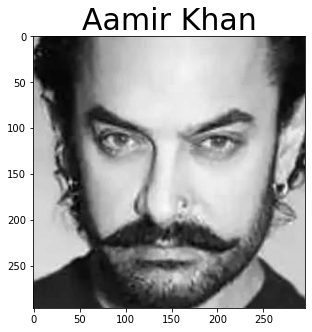

In [31]:
plt.figure(figsize = (5,5))
plt.title("Aamir Khan",fontdict = {'fontsize' : 30})
plt.imshow(cv2.cvtColor(cv2.imread(imset[0]), cv2.COLOR_BGR2GRAY),cmap='gray')

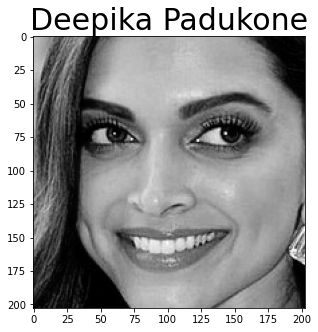

In [32]:
plt.figure(figsize = (5,5))
plt.title("Deepika Padukone",fontdict = {'fontsize' : 30})
plt.imshow(cv2.cvtColor(cv2.imread(imset[1]), cv2.COLOR_BGR2GRAY),cmap='gray')

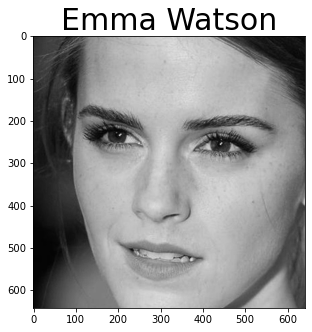

In [33]:
plt.figure(figsize = (5,5))
plt.title("Emma Watson",fontdict = {'fontsize' : 30})
plt.imshow(cv2.cvtColor(cv2.imread(imset[2]), cv2.COLOR_BGR2GRAY),cmap='gray')

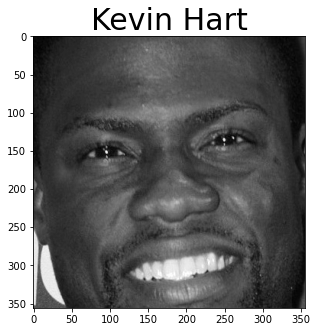

In [34]:
plt.figure(figsize = (5,5))
plt.title("Kevin Hart",fontdict = {'fontsize' : 30})
plt.imshow(cv2.cvtColor(cv2.imread(imset[3]), cv2.COLOR_BGR2GRAY),cmap='gray')

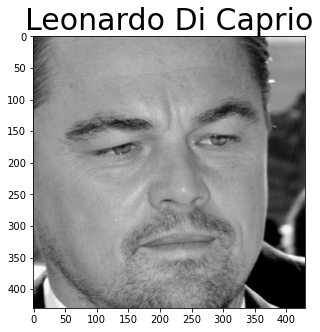

In [35]:
plt.figure(figsize = (5,5))
plt.title("Leonardo Di Caprio",fontdict = {'fontsize' : 30})
plt.imshow(cv2.cvtColor(cv2.imread(imset[4]), cv2.COLOR_BGR2GRAY),cmap='gray')

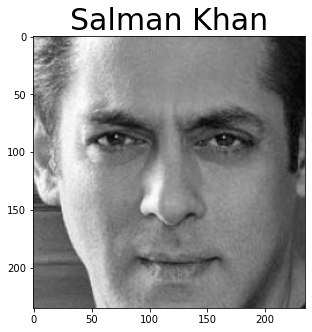

In [36]:
plt.figure(figsize = (5,5))
plt.title("Salman Khan",fontdict = {'fontsize' : 30})
plt.imshow(cv2.cvtColor(cv2.imread(imset[5]), cv2.COLOR_BGR2GRAY),cmap='gray')

In [66]:
X = np.array(X).reshape(len(X),4096).astype(float) #image dimensions = 32*32*3=4096
X.shape

(412, 4096)

In [67]:
X

array([[142., 144., 148., ...,  32.,   1.,   0.],
       [ 22.,  21.,  30., ..., 221., 227., 250.],
       [ 34.,  31.,  31., ...,   0.,   0.,   0.],
       ...,
       [180., 180., 180., ..., 250.,   0.,   1.],
       [ 23.,  32.,  52., ...,   5.,   2.,   4.],
       [249., 238., 234., ...,   2.,   4.,   2.]])

# Model

In [68]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0,test_size=0.2)

In [69]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score
from xgboost import XGBClassifier


### XGB

In [73]:
import xgboost as xgb
model = xgb.XGBRegressor()
model.fit(X_train, y_train)
pred = model.predict(X_test)
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))
metrics.r2_score(y_test, pred)

MAE: 0.9348745119858937
MSE: 1.955317671366814
RMSE: 1.3983267398454533


0.38447343090632513

### SVC

In [75]:
from sklearn.svm import SVC
modelsvc = SVC()

In [76]:
from sklearn.model_selection import GridSearchCV
 
# defining parameter range
paramgrid = [{'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['linear']},{'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}]
 
grid = GridSearchCV(SVC(), paramgrid, refit = True, verbose = 5)
 
# fitting the model for grid search
grid.fit(X_train, y_train)
print(grid.best_params_)
 
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV 1/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.833 total time=   0.1s
[CV 2/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.833 total time=   0.1s
[CV 3/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.727 total time=   0.1s
[CV 4/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.803 total time=   0.1s
[CV 5/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.815 total time=   0.1s
[CV 1/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.833 total time=   0.1s
[CV 2/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.833 total time=   0.1s
[CV 3/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.727 total time=   0.1s
[CV 4/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.803 total time=   0.1s
[CV 5/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.815 total time=   0.1s
[CV 1/5] END ..C=0.1, gamma=0.01, kernel=linear;, score=0.833 total time=   0.1s
[CV 2/5] END ..C=0.1, gamma=0.01, kernel=linear

[CV 3/5] END ....C=1000, gamma=1, kernel=linear;, score=0.727 total time=   0.1s
[CV 4/5] END ....C=1000, gamma=1, kernel=linear;, score=0.803 total time=   0.1s
[CV 5/5] END ....C=1000, gamma=1, kernel=linear;, score=0.815 total time=   0.1s
[CV 1/5] END ..C=1000, gamma=0.1, kernel=linear;, score=0.833 total time=   0.1s
[CV 2/5] END ..C=1000, gamma=0.1, kernel=linear;, score=0.833 total time=   0.1s
[CV 3/5] END ..C=1000, gamma=0.1, kernel=linear;, score=0.727 total time=   0.1s
[CV 4/5] END ..C=1000, gamma=0.1, kernel=linear;, score=0.803 total time=   0.1s
[CV 5/5] END ..C=1000, gamma=0.1, kernel=linear;, score=0.815 total time=   0.0s
[CV 1/5] END .C=1000, gamma=0.01, kernel=linear;, score=0.833 total time=   0.1s
[CV 2/5] END .C=1000, gamma=0.01, kernel=linear;, score=0.833 total time=   0.1s
[CV 3/5] END .C=1000, gamma=0.01, kernel=linear;, score=0.727 total time=   0.1s
[CV 4/5] END .C=1000, gamma=0.01, kernel=linear;, score=0.803 total time=   0.0s
[CV 5/5] END .C=1000, gamma=

[CV 5/5] END ........C=100, gamma=1, kernel=rbf;, score=0.523 total time=   0.1s
[CV 1/5] END ......C=100, gamma=0.1, kernel=rbf;, score=0.424 total time=   0.1s
[CV 2/5] END ......C=100, gamma=0.1, kernel=rbf;, score=0.439 total time=   0.1s
[CV 3/5] END ......C=100, gamma=0.1, kernel=rbf;, score=0.409 total time=   0.1s
[CV 4/5] END ......C=100, gamma=0.1, kernel=rbf;, score=0.409 total time=   0.1s
[CV 5/5] END ......C=100, gamma=0.1, kernel=rbf;, score=0.523 total time=   0.1s
[CV 1/5] END .....C=100, gamma=0.01, kernel=rbf;, score=0.424 total time=   0.1s
[CV 2/5] END .....C=100, gamma=0.01, kernel=rbf;, score=0.439 total time=   0.1s
[CV 3/5] END .....C=100, gamma=0.01, kernel=rbf;, score=0.409 total time=   0.1s
[CV 4/5] END .....C=100, gamma=0.01, kernel=rbf;, score=0.409 total time=   0.1s
[CV 5/5] END .....C=100, gamma=0.01, kernel=rbf;, score=0.523 total time=   0.1s
[CV 1/5] END ....C=100, gamma=0.001, kernel=rbf;, score=0.424 total time=   0.1s
[CV 2/5] END ....C=100, gamm

In [77]:
gridpred = grid.predict(X_test)
 
# print classification report
print(classification_report(y_test, gridpred))

              precision    recall  f1-score   support

           0       0.86      0.63      0.73        19
           1       0.77      1.00      0.87        10
           2       0.87      0.81      0.84        16
           3       0.90      1.00      0.95         9
           4       0.78      0.88      0.82        16
           5       0.77      0.77      0.77        13

    accuracy                           0.82        83
   macro avg       0.82      0.85      0.83        83
weighted avg       0.82      0.82      0.81        83



In [78]:
print("Accuracy",accuracy_score(y_test,gridpred))
print("Precision",precision_score(y_test,gridpred, average='micro'))

Accuracy 0.8192771084337349
Precision 0.8192771084337349


Text(69.0, 0.5, 'Truth')

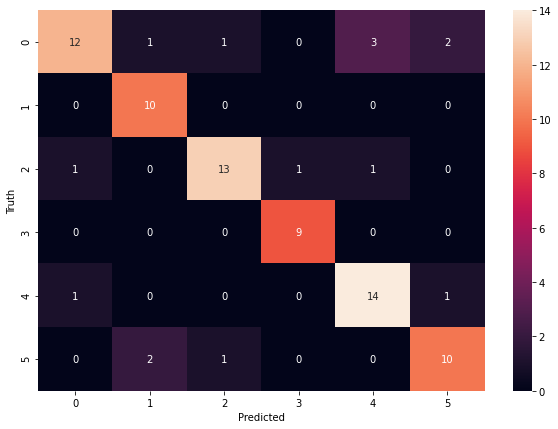

In [86]:
cmg = confusion_matrix(y_test, gridpred)
plt.figure(figsize = (10,7))
sn.heatmap(cmg, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

### Voting Classifier

In [91]:
svc = SVC(probability=True)
lrc = LogisticRegression(solver='lbfgs', max_iter=500)
etc = ExtraTreesClassifier(n_estimators=60, random_state=2)
dt = DecisionTreeClassifier()
#A voting classifier is a classification method that employs multiple classifiers to make predictions.
from sklearn.ensemble import VotingClassifier

In [96]:
# In soft voting, it will use a weighted approach to make its decision.
voting = VotingClassifier(estimators=[('svm', svc), ('lr', lrc), ('et', etc),('dt',dt)],voting='soft')

In [97]:
voting.fit(X_train,y_train)
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred, average='micro'))

Accuracy 0.8072289156626506
Precision 0.8072289156626506


Text(69.0, 0.5, 'Truth')

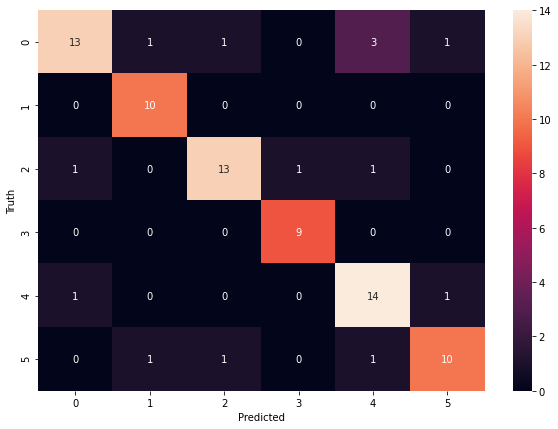

In [85]:
cmv = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (10,7))
sn.heatmap(cmv, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

### Logistic Regression 

In [83]:
lrg = LogisticRegression(solver='lbfgs', max_iter=800)
lrg.fit(X_train,y_train)
lrpred=lrg.predict(X_test)
print("Accuracy",accuracy_score(y_test,lrpred))
print("Precision",precision_score(y_test,lrpred, average='micro'))

Accuracy 0.8313253012048193
Precision 0.8313253012048193


Text(69.0, 0.5, 'Truth')

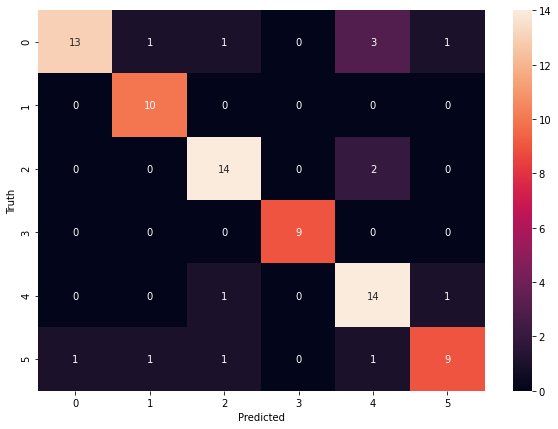

In [84]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, lrpred)
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

# Labels to store in JSON file

In [87]:
labeldict

{'C:\\Users\\prakhar\\Desktop\\DsProj3\\croppedaamir_khan_images': 0,
 'C:\\Users\\prakhar\\Desktop\\DsProj3\\croppeddeepika_padukone_images': 1,
 'C:\\Users\\prakhar\\Desktop\\DsProj3\\croppedemma_watson_images': 2,
 'C:\\Users\\prakhar\\Desktop\\DsProj3\\croppedkevin_hart_images': 3,
 'C:\\Users\\prakhar\\Desktop\\DsProj3\\croppedleonardo_di_caprio_images': 4,
 'C:\\Users\\prakhar\\Desktop\\DsProj3\\croppedsalman_khan_images': 5}

# Save Model

In [98]:
!pip install joblib
import joblib 
# Save the model as a pickle in a file 
joblib.dump(lrg, 'saved_model.pkl')

You should consider upgrading via the 'd:\anaconda\python.exe -m pip install --upgrade pip' command.


['saved_model.pkl']

In [99]:
import json
with open("labeldictionary.json","w") as f:
    f.write(json.dumps(labeldict))